In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv


# 1. Regression Analysis

In [2]:
df = pd.read_csv('/kaggle/input/spotify-most-streamed-songs/Spotify Most Streamed Songs.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


### Aggregate Streams by Year: Calculate the total number of streams per year.

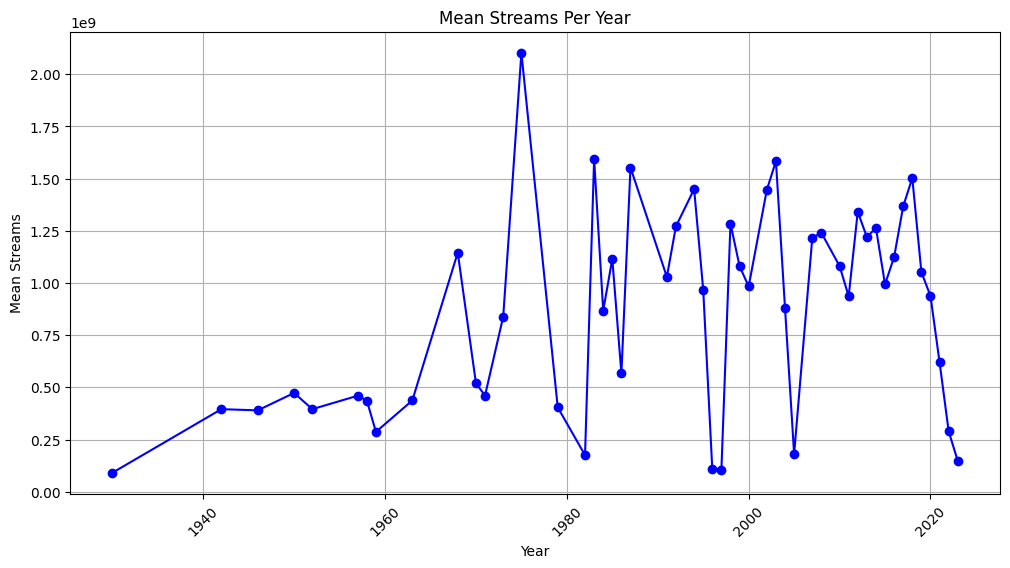

In [43]:
# Assuming 'df' is your DataFrame
mean_streams_per_year = df.groupby('released_year')['streams'].mean().reset_index()

# Rename the columns for clarity
mean_streams_per_year.columns = ['released_year', 'mean_streams']

plt.figure(figsize=(12, 6))
plt.plot(mean_streams_per_year['released_year'], mean_streams_per_year['mean_streams'], marker='o', color='blue')
plt.title('Mean Streams Per Year')
plt.xlabel('Year')
plt.ylabel('Mean Streams')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Average Musical Attributes by Year: Analyze how attributes like `danceability`, `energy`, and `valence` have changed over time.

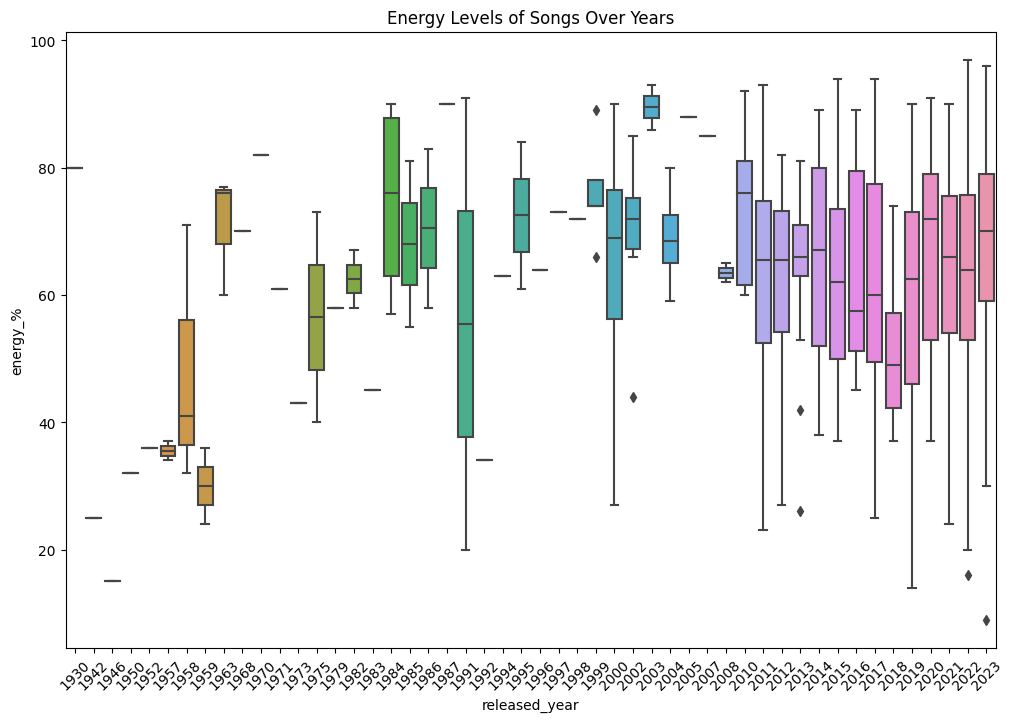

In [37]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='released_year', y='energy_%', data=df)
plt.title('Energy Levels of Songs Over Years')
plt.xticks(rotation=45)
plt.show()

### Average Artist Count: Analyze how the average number of artists per song has changed over the years.

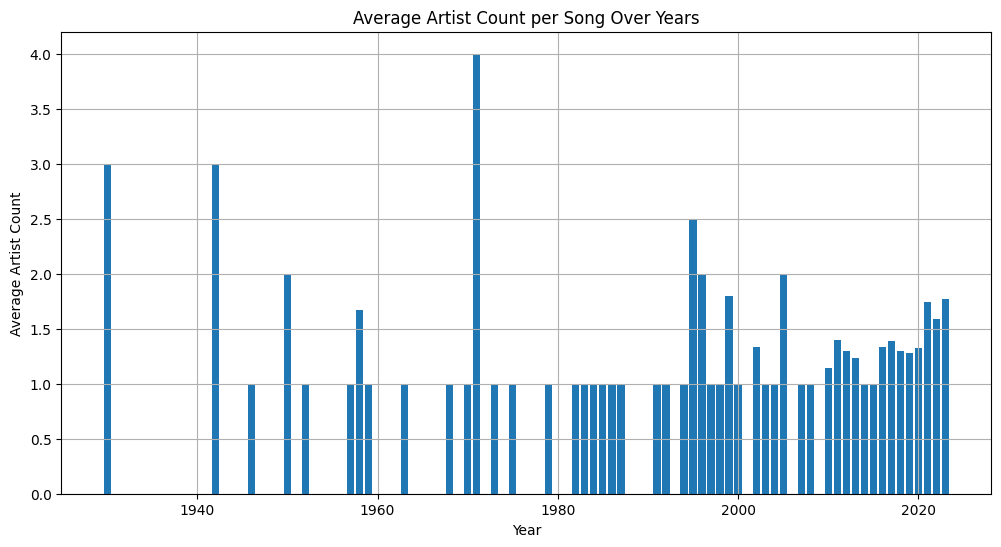

In [38]:
avg_artist_count_per_year = df.groupby('released_year')['artist_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(avg_artist_count_per_year['released_year'], avg_artist_count_per_year['artist_count'])
plt.title('Average Artist Count per Song Over Years')
plt.xlabel('Year')
plt.ylabel('Average Artist Count')
plt.grid()
plt.show()

In [21]:
# Assuming 'df' is your DataFrame
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df = df.dropna(subset=['streams'])

# Correlation between musical attributes and song popularity.

In [44]:
# Selecting relevant columns
attributes = df[['bpm', 'danceability_%', 'energy_%', 'valence_%', 
                 'acousticness_%', 'instrumentalness_%', 'liveness_%', 
                 'speechiness_%', 'artist_count', 'streams']]

# Calculate correlation matrix
correlation_matrix = attributes.corr()

# Display the correlation matrix
print(correlation_matrix)

                         bpm  danceability_%  energy_%  valence_%  \
bpm                 1.000000       -0.147630  0.025932   0.041693   
danceability_%     -0.147630        1.000000  0.198485   0.409873   
energy_%            0.025932        0.198485  1.000000   0.357516   
valence_%           0.041693        0.409873  0.357516   1.000000   
acousticness_%     -0.018065       -0.237128 -0.577318  -0.081161   
instrumentalness_% -0.001283       -0.089371 -0.038492  -0.132765   
liveness_%         -0.000803       -0.077665  0.117334   0.021382   
speechiness_%       0.038937        0.184393 -0.004632   0.041874   
artist_count       -0.038680        0.206543  0.137317   0.128712   
streams            -0.002438       -0.105457 -0.026051  -0.040831   

                    acousticness_%  instrumentalness_%  liveness_%  \
bpm                      -0.018065           -0.001283   -0.000803   
danceability_%           -0.237128           -0.089371   -0.077665   
energy_%                 -0.57

## Confusion Matrix Heatmap

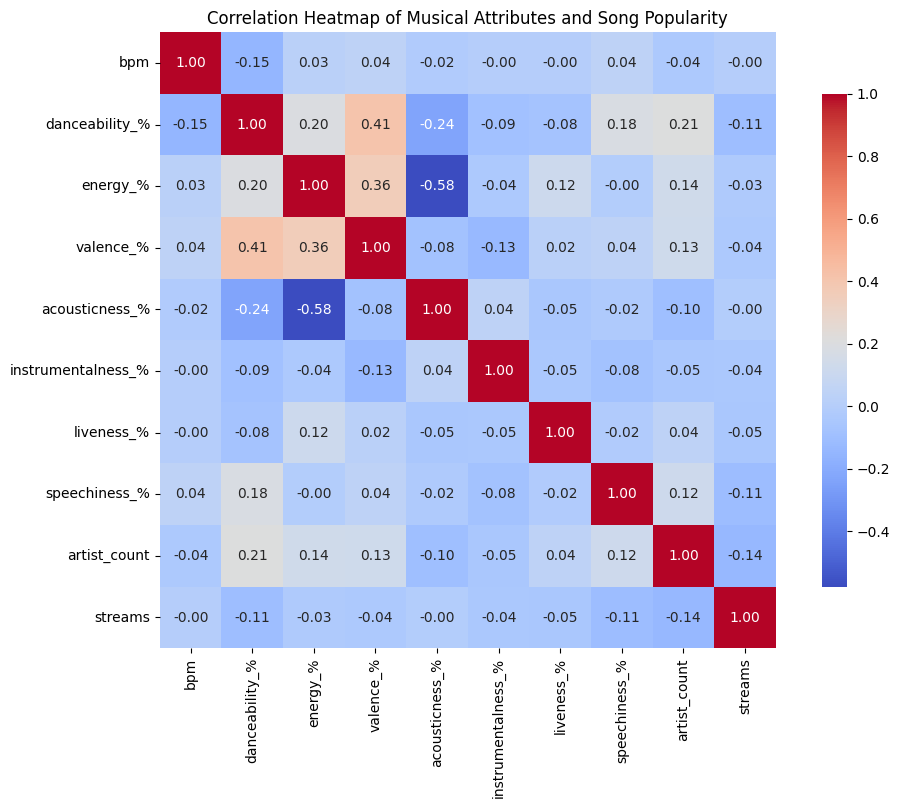

In [45]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Musical Attributes and Song Popularity')
plt.show()

## Exampple: Danceability vs Streams

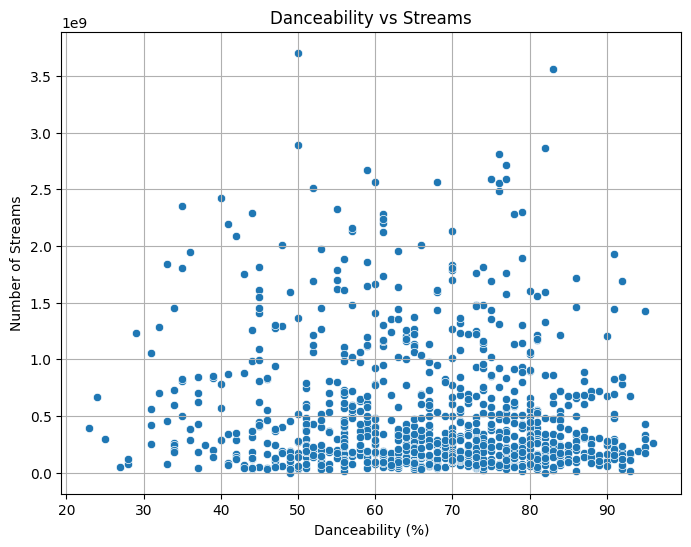

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=attributes, x='danceability_%', y='streams')
plt.title('Danceability vs Streams')
plt.xlabel('Danceability (%)')
plt.ylabel('Number of Streams')
plt.grid()
plt.show()

In [106]:
# Log transformation (if needed)
df['log_streams'] = np.log1p(df['streams'])
y = df['log_streams']

In [107]:
X = df[['artist_count', 
        'bpm',
        'danceability_%',
        'energy_%',
        'valence_%', 
        'acousticness_%',
        'instrumentalness_%',
        'liveness_%',
        'speechiness_%'
       ]]

y = df['log_streams']
print(y_train.head())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

251    2.313321e+08
351    9.343891e+07
904    1.894761e+08
919    8.469773e+07
658    1.202723e+09
Name: streams, dtype: float64


In [108]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [109]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

MAE: 0.89
MSE: 1.19
R² Score: -0.04


In [110]:
from sklearn.model_selection import GridSearchCV
looking_for_best = True
if looking_for_best:
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
    grid_search.fit(X_train, y_train)


    print(f'Best parameters: {grid_search.best_params_}')

    # Create a new model with the best parameters
    best_rf_model = RandomForestRegressor(
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)
else:
    best_rf_model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=10,
        random_state=42
    )

# Fit the model on the training data
best_rf_model.fit(X_train, y_train)

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [111]:
# Make predictions
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the model
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Model MAE: {mae_best:.2f}')
print(f'Best Model MSE: {mse_best:.2f}')
print(f'Best Model R² Score: {r2_best:.2f}')

Best Model MAE: 0.88
Best Model MSE: 1.19
Best Model R² Score: -0.04


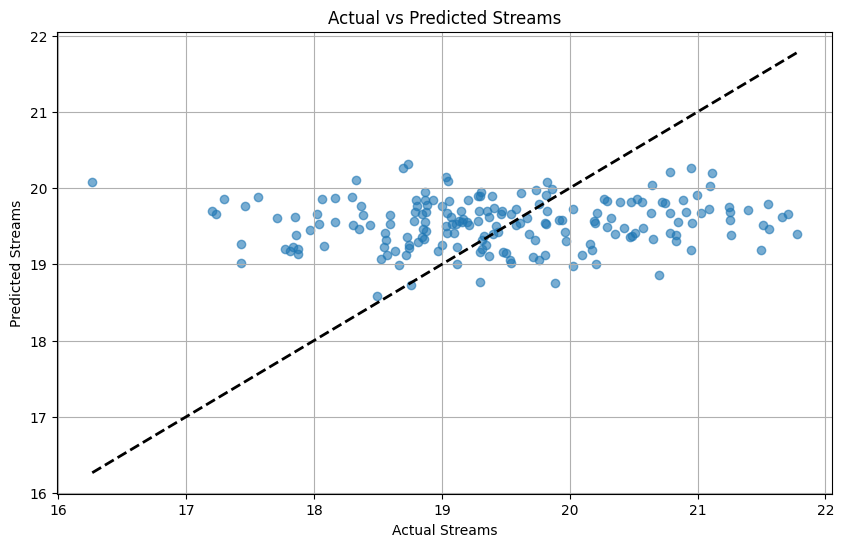

In [113]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # 45-degree line
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams')
plt.grid()
plt.show()

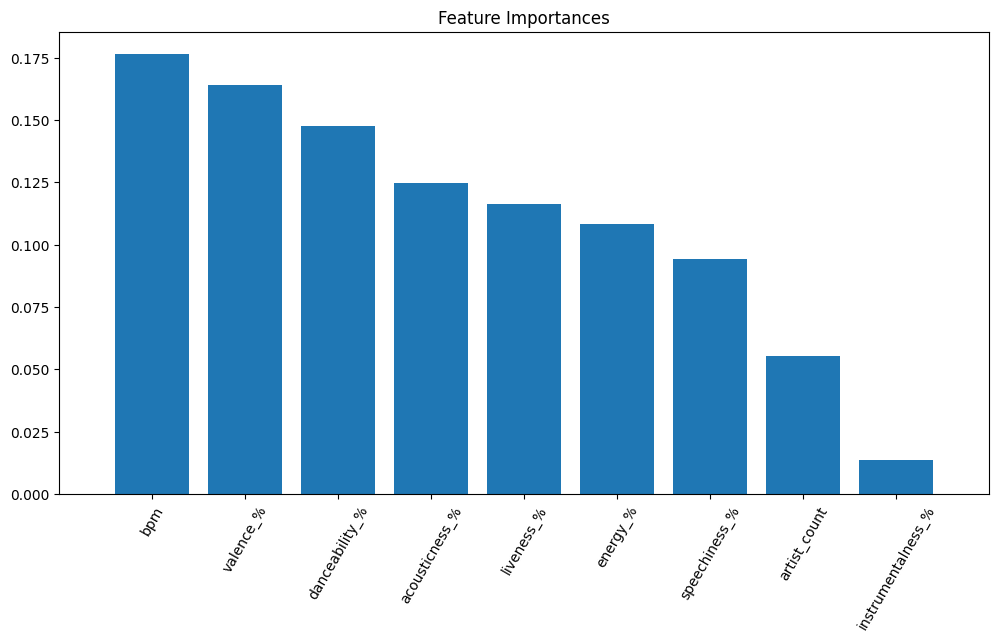

In [114]:
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=60)
plt.xlim([-1, X.shape[1]])
plt.show()

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Gradient Boosting MAE: {mae_gb:.2f}')
print(f'Gradient Boosting MSE: {mse_gb:.2f}')
print(f'Gradient Boosting R² Score: {r2_gb:.2f}')

Gradient Boosting MAE: 0.95
Gradient Boosting MSE: 1.31
Gradient Boosting R² Score: -0.15


In [116]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean():.2f}')

Cross-validated MSE: 1.42
